In [1]:
import numpy as np
from MyML import *
import pandas as pd

In [264]:
data = pd.read_csv('BlackFriday.csv').values

In [265]:
noprod = np.column_stack((data[:,0:8],data[:,11:]))

In [266]:
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test

In [267]:
def oneHotEncode(matrix, columns):
    for column in columns:
        uniques = np.unique(matrix[:,column])
        newmat = np.zeros((len(matrix[:,column]),len(uniques)))

        for i in range(0,len(matrix[:,column])):
            for j in range(0,len(uniques)):
                if(matrix[i,column] == uniques[j]):
                    newmat[i,j] = 1
        matrix = np.column_stack((matrix,newmat))
    try:
        matrix = np.delete(matrix,columns,axis = 1).astype(float)
    except:
        matrix = np.delete(matrix,columns,axis = 1)
    return matrix
newdata = oneHotEncode(data,[2,3,4,5,6,7,8])

In [6]:
total = np.column_stack((newdata[:,0],newdata[:,4:]))

In [7]:
newcol3 =list(map(np.nan_to_num,newdata[:,2]))
newcol4 = list(map(np.nan_to_num,newdata[:,3]))

In [8]:
newpiece = oneHotEncode(np.column_stack((newcol3,newcol4)), [0,1])

In [9]:
newtotal = np.column_stack((total,newpiece))

In [10]:
newtotal

array([[1000001, 8370, 1.0, ..., 0.0, 0.0, 0.0],
       [1000001, 15200, 1.0, ..., 0.0, 0.0, 0.0],
       [1000001, 1422, 1.0, ..., 0.0, 0.0, 0.0],
       ...,
       [1004737, 8043, 0.0, ..., 0.0, 0.0, 0.0],
       [1004737, 7172, 0.0, ..., 0.0, 0.0, 0.0],
       [1004737, 6875, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [11]:
custs = np.unique(newtotal[:,0])

In [12]:
temp = newtotal[np.where(newtotal[:,0]==custs[0]),][0]
final = temp[0,].reshape(1,94)
final[0][1] = np.sum(temp, axis = 0)[1]
for i in range(1,len(custs)):
    temp = newtotal[np.where(newtotal[:,0]==custs[i]),][0]
    temprow = temp[0,].reshape(1,94)
    temprow[0][1] = np.sum(temp, axis = 0)[1]
    final = np.row_stack((final,temprow))

In [13]:
train, val, test = TVTsplit(final)

In [14]:
Xtrain = np.array(train[:,2:], dtype = float)
Ytrain = np.array(train[:,1], dtype = float).reshape(-1,1)
Xval = np.array(val[:,2:], dtype = float)
Yval = np.array(val[:,1], dtype = float).reshape(-1,1)
Xtest = np.array(test[:,2:], dtype = float)
Ytest = np.array(test[:,1], dtype = float).reshape(-1,1)
Yval = (Yval - np.min(Ytrain))/(np.max(Ytrain) - np.min(Ytrain))
Ytest = (Ytest - np.min(Ytrain))/(np.max(Ytrain) - np.min(Ytrain))
Ytrain = (Ytrain - np.min(Ytrain))/(np.max(Ytrain) - np.min(Ytrain))

In [15]:
twoTens = NeuralNetwork(Xtrain.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')

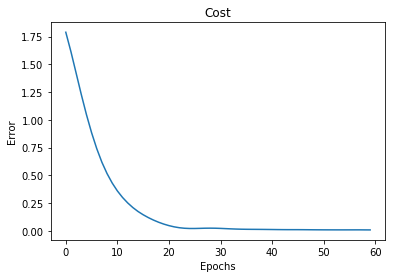

In [16]:
twoTens.train(Xtrain,Ytrain, Xval = Xval,Yval = Yval,epochs = 60, lr = .004, gamma = .8,moment = .8, l1 = .1, optim = 'adam', p = .7)

In [17]:
twoTens.errs[-1]

0.007968396709394449

In [18]:
newnoprod = oneHotEncode(noprod,[2,3,4,5,6,7])
newnoprod = np.column_stack((newnoprod[:,0],newnoprod[:,2:]))

In [19]:
newcusts = np.unique(newnoprod[:,0])

In [20]:
newtemp = newnoprod[np.where(newnoprod[:,0]==newcusts[0]),][0]
newfinal = newtemp[0,].reshape(1,len(newnoprod[0,]))
newfinal[0][1] = np.sum(newtemp, axis = 0)[1]
for i in range(1,len(newcusts)):
    newtemp = newnoprod[np.where(newnoprod[:,0]==newcusts[i]),][0]
    newtemprow = newtemp[0,].reshape(1,len(newnoprod[0,]))
    newtemprow[0][1] = np.sum(newtemp, axis = 0)[1]
    newfinal = np.row_stack((newfinal,newtemprow))

In [21]:
newfinal = np.array(newfinal,dtype = float)

In [22]:
newtrain,newval,newtest = TVTsplit(newfinal)

In [23]:
newXval = newval[:,2:]
newYval = newval[:,1].reshape(-1,1)
# newYval = (newYval - np.min(newY))/(np.max(newY)-np.min(newY))
newXtest = newtest[:,2:]
newYtest = newtest[:,1].reshape(-1,1)
# newYtest = (newYtest - np.min(newY))/(np.max(newY)-np.min(newY))
newX = newtrain[:,2:]
newY = newtrain[:,1].reshape(-1,1)
# newY = (newY - np.min(newY))/(np.max(newY)-np.min(newY))
newYval = (newYval - np.min(newY))/(np.max(newY) - np.min(newY))
newYtest = (newYtest - np.min(newY))/(np.max(newY) - np.min(newY))
newY = (newY - np.min(newY))/(np.max(newY) - np.min(newY))


In [24]:
twoTensnoprod = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')

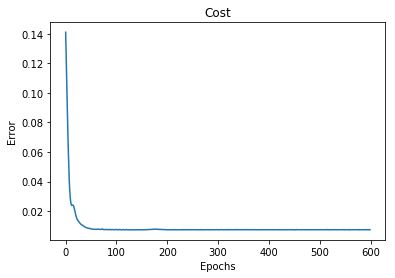

In [25]:
twoTensnoprod.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 600, lr = .004, gamma = .8,moment = .8,l1 = .1, optim = 'adam', p = .7)

In [26]:
twoTensnoprod.errs[-1]

0.007401687005835502

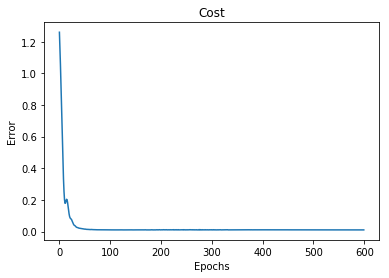

In [27]:
twoTensnoprodnoval = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')
twoTensnoprodnoval.train(newX,newY,epochs = 600, lr = .004, gamma = .8,moment = .8,l1 = .1, optim = 'adam', p = .7)

In [28]:
twoTensnoprodnoval.errs[-1]

0.010383712877505629

In [32]:
np.sqrt(.00701*(np.max(newtrain[:,1].reshape(-1,1))-np.min(newtrain[:,1].reshape(-1,1)))+np.min(newtrain[:,1].reshape(-1,1)))

331.272391363965

In [30]:
np.median(newtrain[:,1].reshape(-1,1))

513447.0

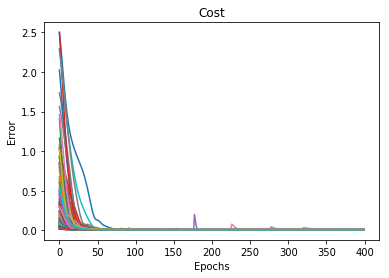

In [84]:
novalerrs = []
valerrs = []
for i in range(1,81):
    percent = i*.0125
    amountX = int(np.round(percent*len(newX[:,0])))
    model = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')
    model.train(newX[0:amountX,],newY[0:amountX,],epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .1, optim = 'adam', p = .7)
    novalerrs.append(model.errs[-1])
    model = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')
    model.train(newX[0:amountX,],newY[0:amountX,],Xval = newXval,Yval= newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .1, optim = 'adam', p = .7)
    valerrs.append(model.errs[-1])

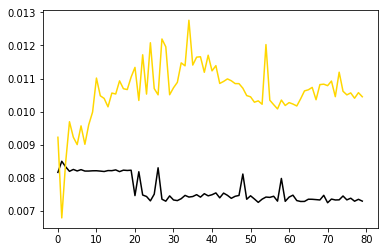

In [85]:
plt.plot(valerrs, c = 'black')
plt.plot(novalerrs, c = 'gold')

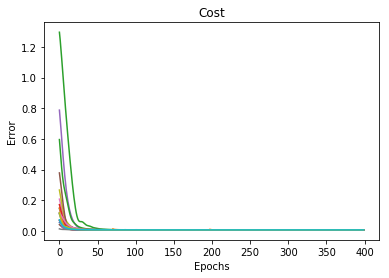

In [103]:
valerrs = []
for i in range(1,21):
    nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [3+i,10,1], taskType = 'r')
    nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .1, optim = 'adam', p = .7)
    valerrs.append(nodemodel.errs[-1])

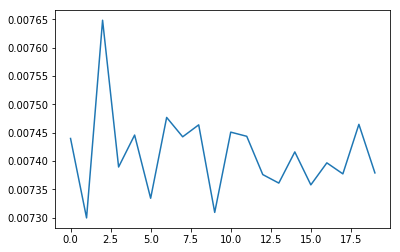

In [104]:
plt.plot(valerrs)

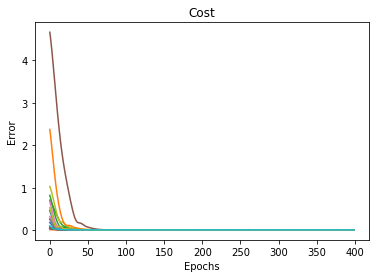

In [107]:
valerrs = []
for i in range(1,21):
    nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [12,2+i,1], taskType = 'r')
    nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .1, optim = 'adam', p = .7)
    valerrs.append(nodemodel.errs[-1])

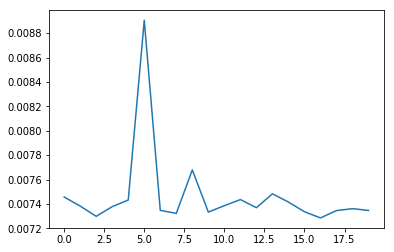

In [108]:
plt.plot(valerrs)

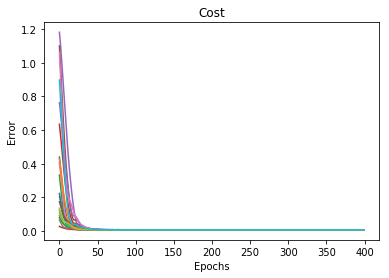

In [113]:
valerrs = []
for i in range(1,21):
    nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
    nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .01*i, optim = 'adam', p = .7)
    valerrs.append(nodemodel.errs[-1])

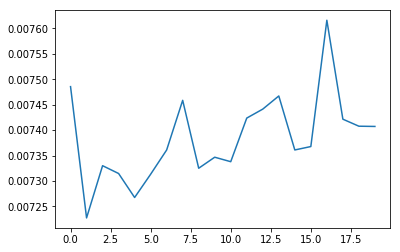

In [114]:
plt.plot(valerrs)

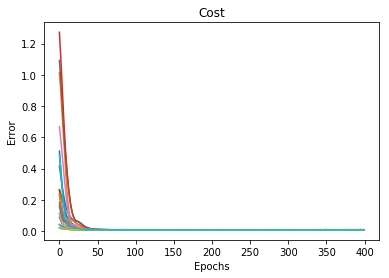

In [158]:
valerrs = []
for i in range(1,21):
    nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
    nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .001*i, optim = 'adam', p = .7)
    valerrs.append(nodemodel.errs[-1])

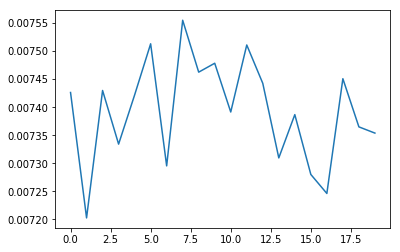

In [159]:
plt.plot(valerrs)

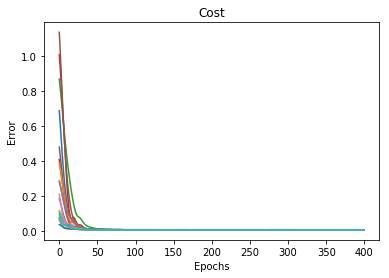

In [128]:
valerrs = []
for i in range(1,21):
    nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
    nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .003, optim = 'adam', p = .05*i)
    valerrs.append(nodemodel.errs[-1])

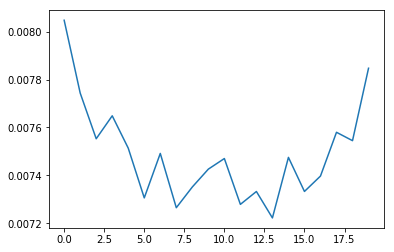

In [129]:
plt.plot(valerrs)

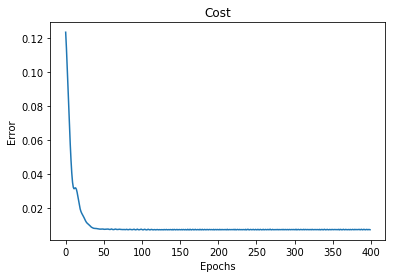

In [131]:
nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .003, optim = 'adam', p = .75)

In [132]:
nodemodel.errs[-1]

0.007357305393653187

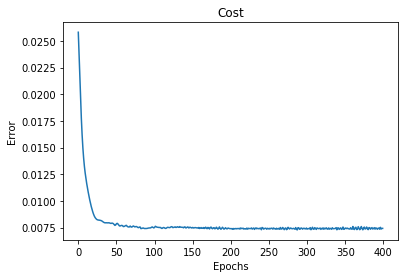

In [143]:
nodemodel = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
nodemodel.train(newX,newY, Xval = newXval,Yval = newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .003, optim = 'adam', p = .75)

In [144]:
nodemodel.errs[-1]

0.007430920581808129

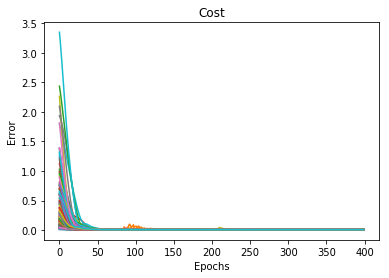

In [145]:
novalerrs = []
valerrs = []
for i in range(1,81):
    percent = i*.0125
    amountX = int(np.round(percent*len(newX[:,0])))
    model = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')
    model.train(newX[0:amountX,],newY[0:amountX,],epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .003, optim = 'adam', p = .75)
    novalerrs.append(model.errs[-1])
    model = NeuralNetwork(newX.shape[1], activations = ['relu','relu'], nodes = [10,10,1], taskType = 'r')
    model.train(newX[0:amountX,],newY[0:amountX,],Xval = newXval,Yval= newYval,epochs = 400, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .003, optim = 'adam', p = .75)
    valerrs.append(model.errs[-1])

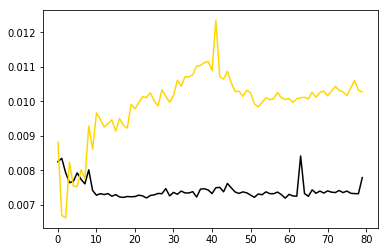

In [146]:
plt.plot(valerrs, c = 'black')
plt.plot(novalerrs, c = 'gold')

0.7917928230077345
0.7624821485069606


0.00779066012653001

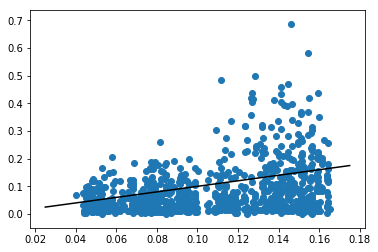

In [238]:
model.predict(newXval, p=1)
print(np.median(np.abs(model.prediction - newYval)/np.abs(newYval)))
plt.scatter(model.predict(newXval,p = 1),newYval)
plt.plot([.025,.175],[.025,.175], c = 'black')
model.predict(newXtest, p=1)
print(np.median(np.abs(model.prediction - newYtest)/np.abs(newYtest)))
model.errs[-1]

In [162]:
full = np.array(newtotal,dtype = float)

In [258]:
alltrain, allval, alltest = TVTsplit(full)
alltrain

array([[1.000001e+06, 8.370000e+03, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000001e+06, 1.520000e+04, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000001e+06, 1.422000e+03, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.003903e+06, 5.158000e+03, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.003903e+06, 1.455800e+04, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.003903e+06, 6.925000e+03, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [166]:
Xalltrain = alltrain[:,2:]
Yalltrain = alltrain[:,1].reshape(-1,1)
Xallval = allval[:,2:]
Yallval = allval[:,1].reshape(-1,1)
Xalltest = alltest[:,2:]
Yalltest = alltest[:,1].reshape(-1,1)

In [174]:
Yallval = (Yallval - np.min(Yalltrain))/(np.max(Yalltrain)-np.min(Yalltrain))
Yalltest = (Yalltest - np.min(Yalltrain))/(np.max(Yalltrain)-np.min(Yalltrain))
Yalltrain = (Yalltrain - np.min(Yalltrain))/(np.max(Yalltrain)-np.min(Yalltrain))

KeyboardInterrupt: 

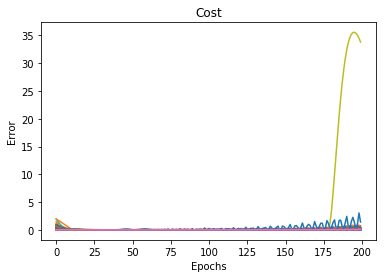

In [183]:
toterrs = []
for i in range(0,6):
    for k in range(0,6):
        for j in range(1,6):
            allmodel = NeuralNetwork(Xalltrain.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
            allmodel.train(Xalltrain,Yalltrain, Xval = Xallval,Yval = Yallval,epochs = 200, lr = .01, l1 = .02*i, l2 = .004*k, p = j*.2, gamma = .8,moment = .8, optim = 'adam')
            toterrs.append([i,j,k,allmodel.errs[-1]])

In [196]:
np.where(np.array(toterrs)[:,3]==np.min(toterrs, axis  = 0)[3])

(array([19]),)

In [197]:
toterrs[19]

[0, 5, 3, 0.015418941009421892]

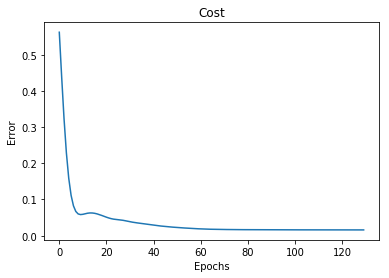

In [222]:
newallmodel = NeuralNetwork(Xalltrain.shape[1], activations = ['relu','relu'], nodes = [12,12,1], taskType = 'r')
newallmodel.train(Xalltrain,Yalltrain, Xval = Xallval,Yval = Yallval,epochs = 130, lr = .005, p = .8, gamma = .8,moment = .8, optim = 'adam')

In [ ]:
newallmodel.predict(Xallval, p = 1)
plt.scatter(newallmodel.prediction,Yallval)
plt.plot([0,1],[0,1])
newallmodel.errs[-1]

In [240]:
newallmodel.predict(Xallval, p =1)
print(np.median(np.abs(newallmodel.prediction - Yallval)/np.abs(Yallval)))
print(newallmodel.errs[-1])
newallmodel.predict(Xalltest, p =1)
print(np.median(np.abs(newallmodel.prediction - Yalltest)/np.abs(Yalltest)))
print(newallmodel.errs[-1])

0.19932431670786485
0.015926454701960514
0.19921171932875203
0.015926454701960514


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


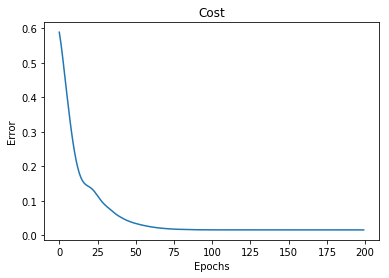

In [225]:
interpretablemodel = NeuralNetwork(Xalltrain.shape[1], activations = [], nodes = [1], taskType = 'r')
interpretablemodel.train(Xalltrain,Yalltrain, Xval = Xallval,Yval = Yallval,epochs = 200, lr = .005,l1 = .02,l2 = .01, gamma = .8,moment = .8, optim = 'adam')

In [226]:
interpretablemodel.errs[-1]

0.016065798430949015

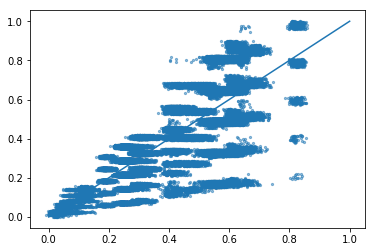

In [305]:
interpretablemodel.predict(Xallval, p = 1)
plt.scatter(interpretablemodel.prediction,Yallval, s= 5, alpha = .5)
plt.plot([0,1],[0,1])

In [249]:
np.median(np.abs(interpretablemodel.prediction - Yallval)/np.abs(Yallval))
interpretablemodel.predict(Xalltest, p =1)
print(np.median(np.abs(interpretablemodel.prediction - Yalltest)/np.abs(Yalltest)))
print(SSE(Yalltest,interpretablemodel))

0.19682696986038703


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: unsupported operand type(s) for -: 'float' and 'NeuralNetwork'

In [247]:
(interpretablemodel.prediction -Yalltest)**2

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.31069693],
       [0.09318703],
       [0.29095863],
       ...,
       [0.11184889],
       [0.02624614],
       [0.06272513]])

KeyboardInterrupt: 

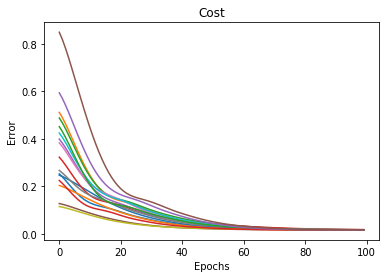

In [236]:
intnovalerrs = []
intvalerrs = []
for i in range(1,11):
    percent = i*.1
    amountX = int(np.round(percent*len(Xalltrain[:,0])))
    intmodel = NeuralNetwork(Xalltrain.shape[1], activations = [], nodes = [1], taskType = 'r')
    intmodel.train(Xalltrain[0:amountX,],Yalltrain[0:amountX,],epochs = 100, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .01, optim = 'adam')
    intnovalerrs.append(intmodel.errs[-1])
    intmodel = NeuralNetwork(Xalltrain.shape[1], activations = [], nodes = [1], taskType = 'r')
    intmodel.train(Xalltrain[0:amountX,],Yalltrain[0:amountX,],Xval = Xallval,Yval= Yallval,epochs =100, lr = .004, gamma = .8,moment = .8,l1 = .02,l2 = .01, optim = 'adam')
    intvalerrs.append(intmodel.errs[-1])

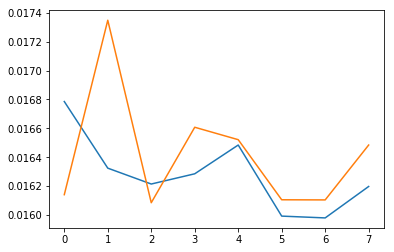

In [237]:
plt.plot(intnovalerrs)
plt.plot(intvalerrs)

In [257]:
intmodel.predict(Xalltest, p =1)
print(np.median(np.abs(intmodel.prediction - Yalltest)/np.abs(Yalltest)))
print(intmodel.errs[-1])

0.22876930386576863
0.020233523446968413


/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [262]:
newdata = np.array(data)

In [268]:
newtotal = np.column_stack((newdata[:,0:2],newdata[:,4:]))

In [271]:
strings = np.array(newtotal[:,1], dtype = str)

In [273]:
for i in range(0,len(strings)):
    strings[i] = strings[i][1:]

In [276]:
newtotal[:,1] = np.array(strings, dtype = float)

In [278]:
newtotal = np.array(newtotal, dtype = float)

In [286]:
newfinal = oneHotEncode(newtotal,range(3,len(newtotal[0,])))

In [287]:
newfinal = newfinal[:,1:]
newfinal[:,[0,1]] = newfinal[:,[1,0]]

In [288]:
fulltrain, fullval, fulltest = TVTsplit(newfinal)

In [294]:
newfulltrain = (fulltrain - np.min(fulltrain,axis = 0))/(np.max(fulltrain,axis = 0)-np.min(fulltrain,axis = 0))
newfullval = (fullval - np.min(fulltrain,axis = 0))/(np.max(fulltrain,axis = 0)-np.min(fulltrain,axis = 0))
newfulltest = (fulltest - np.min(fulltrain,axis = 0))/(np.max(fulltrain,axis = 0)-np.min(fulltrain,axis = 0))

In [300]:
fullXtrain = newfulltrain[:,1:]
fullYtrain = newfulltrain[:,0].reshape(-1,1)
fullXval = newfullval[:,1:]
fullYval = newfullval[:,0].reshape(-1,1)
fullXtest = newfulltest[:,1:]
fullYtest = newfulltest[:,0].reshape(-1,1)

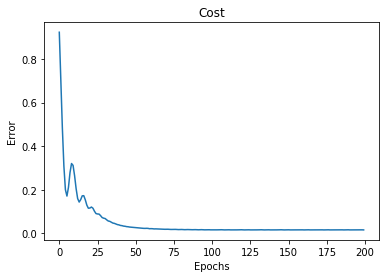

In [306]:
fullmodel = NeuralNetwork(fullXtrain.shape[1], activations = [], nodes = [1], taskType = 'r')
fullmodel.train(fullXtrain,fullYtrain, Xval = fullXval,Yval = fullYval,epochs = 200, lr = .005,l1 = .1,l2 = .01, gamma = .8,moment = .8, optim = 'adam')

In [307]:
fullmodel.errs[-1]

0.016333175220663958

In [310]:
uniques = np.array(np.unique(newdata[:,1]), dtype = str)

In [319]:
newdata[:,[1,2,3,4]] = newdata[:,[2,3,4,1]]
newdata[0,]

array([1000001, 8370, 'P00069042', nan, nan, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [323]:
np.array(newdata[:,3:], dtype = float)

array([[nan, nan,  1., ...,  0.,  0.,  0.],
       [ 6., 14.,  1., ...,  0.,  0.,  0.],
       [nan, nan,  1., ...,  0.,  0.,  0.],
       ...,
       [15., nan,  0., ...,  0.,  0.,  0.],
       [nan, nan,  0., ...,  0.,  0.,  0.],
       [ 8., nan,  0., ...,  0.,  0.,  0.]])

In [ ]:
def newohe(matrix, uniques):
    for i in range(0, len(matrix[:,]))